<h1><center>Case Study 1:</center></h1>
<h2><center>Superconductivity Dataset</center></h2>
<h3>Authors:</h3>
Hien Lam <br>
Joaquin Dominguez <br>
Richard Kim <br>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Clean

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/ryskgit/QTW_CaseStudy/main/Case%20Study%201/Raw%20Data%201/train.csv')
material = pd.read_csv('https://raw.githubusercontent.com/ryskgit/QTW_CaseStudy/main/Case%20Study%201/Raw%20Data%201/unique_m.csv')
train.drop(columns="critical_temp", inplace=True)
df = pd.concat([train, material], axis=1)
df.drop(columns='material', inplace=True)

# same way with pd.merge()
# df = pd.merge(train, material, left_index=True, right_index=True)
# df.drop(columns=["critical_temp_y", "material"], inplace=True)
# df.rename(columns={"critical_temp_x":"critical_temp"}, inplace=True)

In [3]:
single_vals = df.columns[df.eq(df.iloc[0]).all()].tolist()
print(f"There are {len(single_vals)} columns with single values: {single_vals}")
print(f"Original data dimiension: {df.shape}")
df.drop(columns=single_vals, inplace=True)
print(f"Final data dim after dropping aforementioned columns: {df.shape}")
print(f"There are {df.isna().sum().sum()} NA values and {df.duplicated().sum()} duplicated records")

There are 9 columns with single values: ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn']
Original data dimiension: (21263, 168)
Final data dim after dropping aforementioned columns: (21263, 159)
There are 0 NA values and 0 duplicated records


In [4]:
df.dtypes.value_counts()

float64    156
int64        3
dtype: int64

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,1.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,1.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
2,4,88.944468,57.885242,66.361592,36

In [7]:
pd.reset_option("max_columns")

# Exploratory Data Analysis

### Dimensions and Summary Statistics
The dataset consists of 21,263 rows and 159 columns. A brief overview of summary statistics brings into question the ability to accept the normality assumption from some variables. Further exploration is warranted.

In [43]:
# Dimensions
df.shape

(21263, 159)

In [44]:
# Summary Statistics
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.038206,0.022512,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.177476,0.282265,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,97.240000,10.000000,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,185.000000


In [121]:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass',
       ...
       'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'critical_temp'],
      dtype='object', length=159)

### Addressing Columns
It appears that a large part of the columns in the dataset represent Periodic Elements. For the sake of addressing assumptions with respect to further analysis and modeling, we will exclude those variables during this EDA.

In [45]:
# Make copy to exclude Element variables
df2 = df.copy()


In [46]:
# Create subset excluding elemnent variables
df2_sub = df2.iloc[:, :81]

### Distributions
Here we will plot all the relevant variables and determine their skewness.

array([[<AxesSubplot:title={'center':'number_of_elements'}>,
        <AxesSubplot:title={'center':'mean_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_mean_atomic_mass'}>,
        <AxesSubplot:title={'center':'gmean_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_gmean_atomic_mass'}>,
        <AxesSubplot:title={'center':'entropy_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_entropy_atomic_mass'}>,
        <AxesSubplot:title={'center':'range_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_range_atomic_mass'}>],
       [<AxesSubplot:title={'center':'std_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_std_atomic_mass'}>,
        <AxesSubplot:title={'center':'mean_fie'}>,
        <AxesSubplot:title={'center':'wtd_mean_fie'}>,
        <AxesSubplot:title={'center':'gmean_fie'}>,
        <AxesSubplot:title={'center':'wtd_gmean_fie'}>,
        <AxesSubplot:title={'center':'entropy_fie'}>,
        <AxesSubplot:title={'center':'wtd_entropy_fi

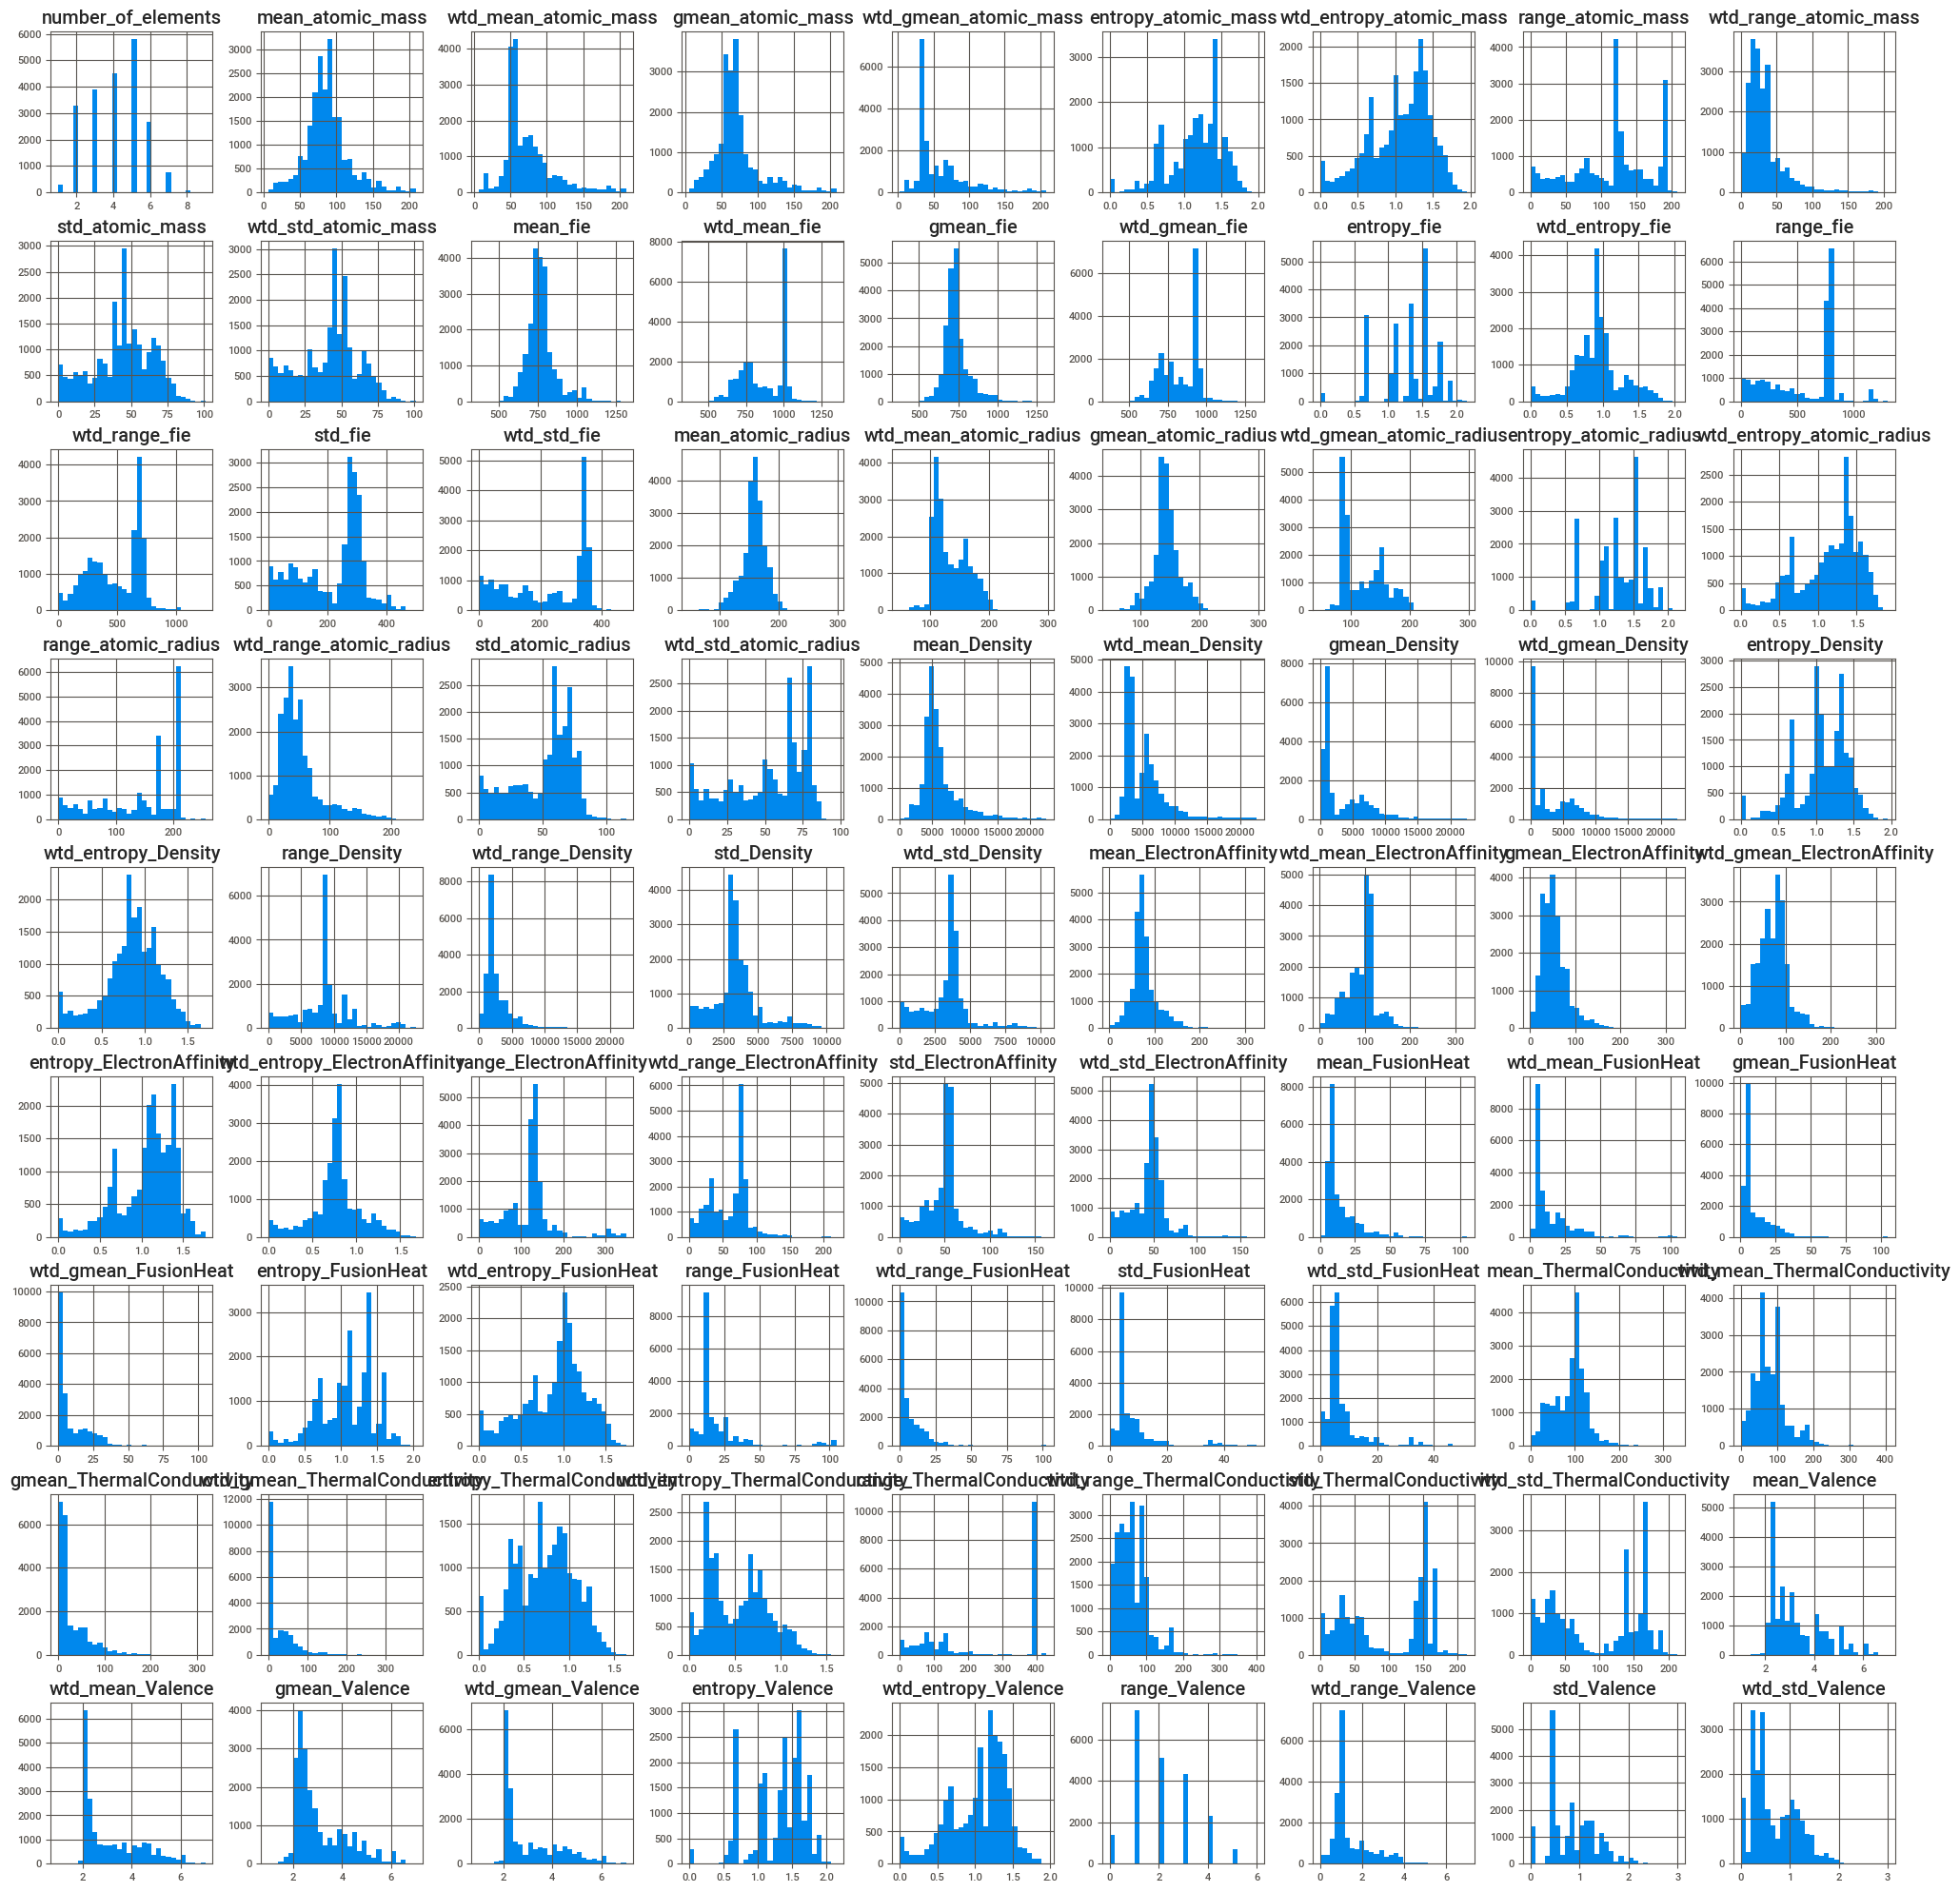

In [127]:
# Histogram plots at a glance
df2_sub.hist(bins=30, figsize=(25, 25))

### Skewness
The plots above showed numerous variables that displayed a non-normal distribution (e.g., 'wtd_range_FusionHeat', 'gmean_ThermalConductivity'). Below, we will identify the variables with the 14 highest skewness scores.

In [116]:
skews = {}
for i in df2_sub:
    if df2_sub[i].skew() > 2:
        skews[i] = df2_sub[i].skew()

skews_list = sorted(skews.items(), key = lambda x:x[1], reverse = True)
skews_dict = dict(skews_list)

In [117]:
skews_list_keys = [i[0] for i in skews_list]
skews_list_values = [i[1] for i in skews_list]

In [120]:
# Columns with greatest amount of skew (30)
print(f'Top 14 Variables (Skewness) :')
a = 1
for i in range(14):
    print(f'{a} : {skews_list_keys[i]} - {skews_list_values[i]}')
    a += 1

Top 14 Variables (Skewness) :
1 : wtd_range_FusionHeat - 4.233613879127433
2 : wtd_range_Density - 3.3227255568242304
3 : wtd_std_FusionHeat - 2.8501338006914527
4 : std_FusionHeat - 2.822554806107452
5 : wtd_mean_FusionHeat - 2.7638258028710343
6 : range_FusionHeat - 2.7485818063583047
7 : gmean_FusionHeat - 2.665477197882816
8 : wtd_gmean_ThermalConductivity - 2.5883047943944177
9 : mean_FusionHeat - 2.52278188047039
10 : wtd_gmean_FusionHeat - 2.4875423104652383
11 : wtd_range_atomic_mass - 2.463807863929849
12 : gmean_ThermalConductivity - 2.3399514687914174
13 : wtd_mean_Density - 2.1377633652220895
14 : mean_Density - 2.103343841114579


### Correlation
Correlations allow us to form a picture about the patterns and dynamics between the variables. Here, we run a for loop to determine those pairs that show a correlation higher than 0.9 (0 to 1 scale), which gives us an indication for feature selection. In this case, 74 different pairs showed a correlation of 0.9 or higher. For a visual represenation, we constructed a correlation heatmap as well.

In [122]:
# Iterate through correlations and print those with a corr > 0.9

rows, cols = df2_sub.shape
flds = list(df2_sub.columns)

corr = df2_sub.corr().values

corr_array = ([])

for i in range(cols):
    for j in range(i+1, cols):
        if abs(corr[i,j]) > 0.9:
            item = [flds[i],flds[j], corr[i,j]]
            corr_array.append(item)

## code adapted from [https://stackoverflow.com/questions/34902649/how-do-i-loop-across-a-correlation-matrix-to-only-give-me-pairs-of-correlations]

In [139]:
print(sorted(corr_array, reverse = True))

[['wtd_std_fie', 'wtd_std_atomic_radius', 0.9222584322105405], ['wtd_mean_fie', 'wtd_gmean_fie', 0.9923310905771069], ['wtd_mean_fie', 'wtd_gmean_atomic_radius', -0.914255374357598], ['wtd_mean_atomic_radius', 'wtd_gmean_atomic_radius', 0.980107203730833], ['wtd_mean_atomic_mass', 'wtd_gmean_atomic_mass', 0.964085104577256], ['wtd_mean_Valence', 'wtd_gmean_Valence', 0.994938772458481], ['wtd_mean_Valence', 'gmean_Valence', 0.9179051994758811], ['wtd_mean_FusionHeat', 'wtd_gmean_FusionHeat', 0.9709480944530617], ['wtd_mean_Density', 'wtd_gmean_Density', 0.9415015834408876], ['wtd_entropy_atomic_radius', 'wtd_entropy_Valence', 0.9514634942012192], ['wtd_entropy_atomic_radius', 'wtd_entropy_FusionHeat', 0.9078597561487545], ['wtd_entropy_atomic_radius', 'entropy_Valence', 0.9191838581966847], ['wtd_entropy_atomic_mass', 'wtd_entropy_atomic_radius', 0.9614639065646935], ['wtd_entropy_atomic_mass', 'wtd_entropy_Valence', 0.9182844431348349], ['wtd_entropy_FusionHeat', 'wtd_entropy_Valence',

In [137]:
corr_list_keys = [i[0:2] for i in corr_array]
corr_list_values = [i[2] for i in corr_array]

In [136]:
print([i[2] for i in corr_array])

[0.9393040581921167, 0.9731953349512207, 0.9722452445107387, 0.904120681959218, 0.900759345055335, 0.9678324511717474, 0.9402981628064275, 0.964085104577256, 0.9646945621906169, 0.9723287801650801, 0.9326681562124369, 0.9282508617972952, 0.963621131760824, 0.9614639065646935, 0.9182844431348349, 0.9608541604762221, 0.9181523701348697, 0.9197877352601848, 0.9693245414475937, 0.9923310905771069, -0.914255374357598, 0.9977393708000531, 0.9201924584212942, 0.9020372817376147, 0.9128622394333814, 0.9165920709495683, 0.9927256131484974, 0.9079230549538471, 0.9816283093891317, 0.9402813114972149, 0.90873435416296, 0.9342550324699199, 0.9222584322105405, 0.9159314467547104, 0.980107203730833, 0.9142226159506714, 0.9155502187775931, 0.9097439800220927, 0.9302940392747194, 0.9895461180639088, 0.9078597561487545, 0.9191838581966847, 0.9514634942012192, 0.9674281611661794, 0.9580035467256449, 0.9445361529101146, 0.9415015834408876, 0.9519948521926215, 0.9177320760917638, 0.900579111211576, 0.95995

In [138]:

# Columns with greatest amount of skew (30)
print(f'Top 14 Variables (Skewness) :')
a = 1
for i in range(len(corr_array)):
    print(f'{a} : {corr_list_keys[i]} - {corr_list_values[i]}')
    a += 1

Top 14 Variables (Skewness) :
1 : ['number_of_elements', 'entropy_atomic_mass'] - 0.9393040581921167
2 : ['number_of_elements', 'entropy_fie'] - 0.9731953349512207
3 : ['number_of_elements', 'entropy_atomic_radius'] - 0.9722452445107387
4 : ['number_of_elements', 'wtd_entropy_atomic_radius'] - 0.904120681959218
5 : ['number_of_elements', 'entropy_FusionHeat'] - 0.900759345055335
6 : ['number_of_elements', 'entropy_Valence'] - 0.9678324511717474
7 : ['mean_atomic_mass', 'gmean_atomic_mass'] - 0.9402981628064275
8 : ['wtd_mean_atomic_mass', 'wtd_gmean_atomic_mass'] - 0.964085104577256
9 : ['entropy_atomic_mass', 'entropy_fie'] - 0.9646945621906169
10 : ['entropy_atomic_mass', 'entropy_atomic_radius'] - 0.9723287801650801
11 : ['entropy_atomic_mass', 'entropy_Density'] - 0.9326681562124369
12 : ['entropy_atomic_mass', 'entropy_FusionHeat'] - 0.9282508617972952
13 : ['entropy_atomic_mass', 'entropy_Valence'] - 0.963621131760824
14 : ['wtd_entropy_atomic_mass', 'wtd_entropy_atomic_radius'] 

In [124]:
# 159 pairs displayed a correlation >0.9
len(corr_array)

74

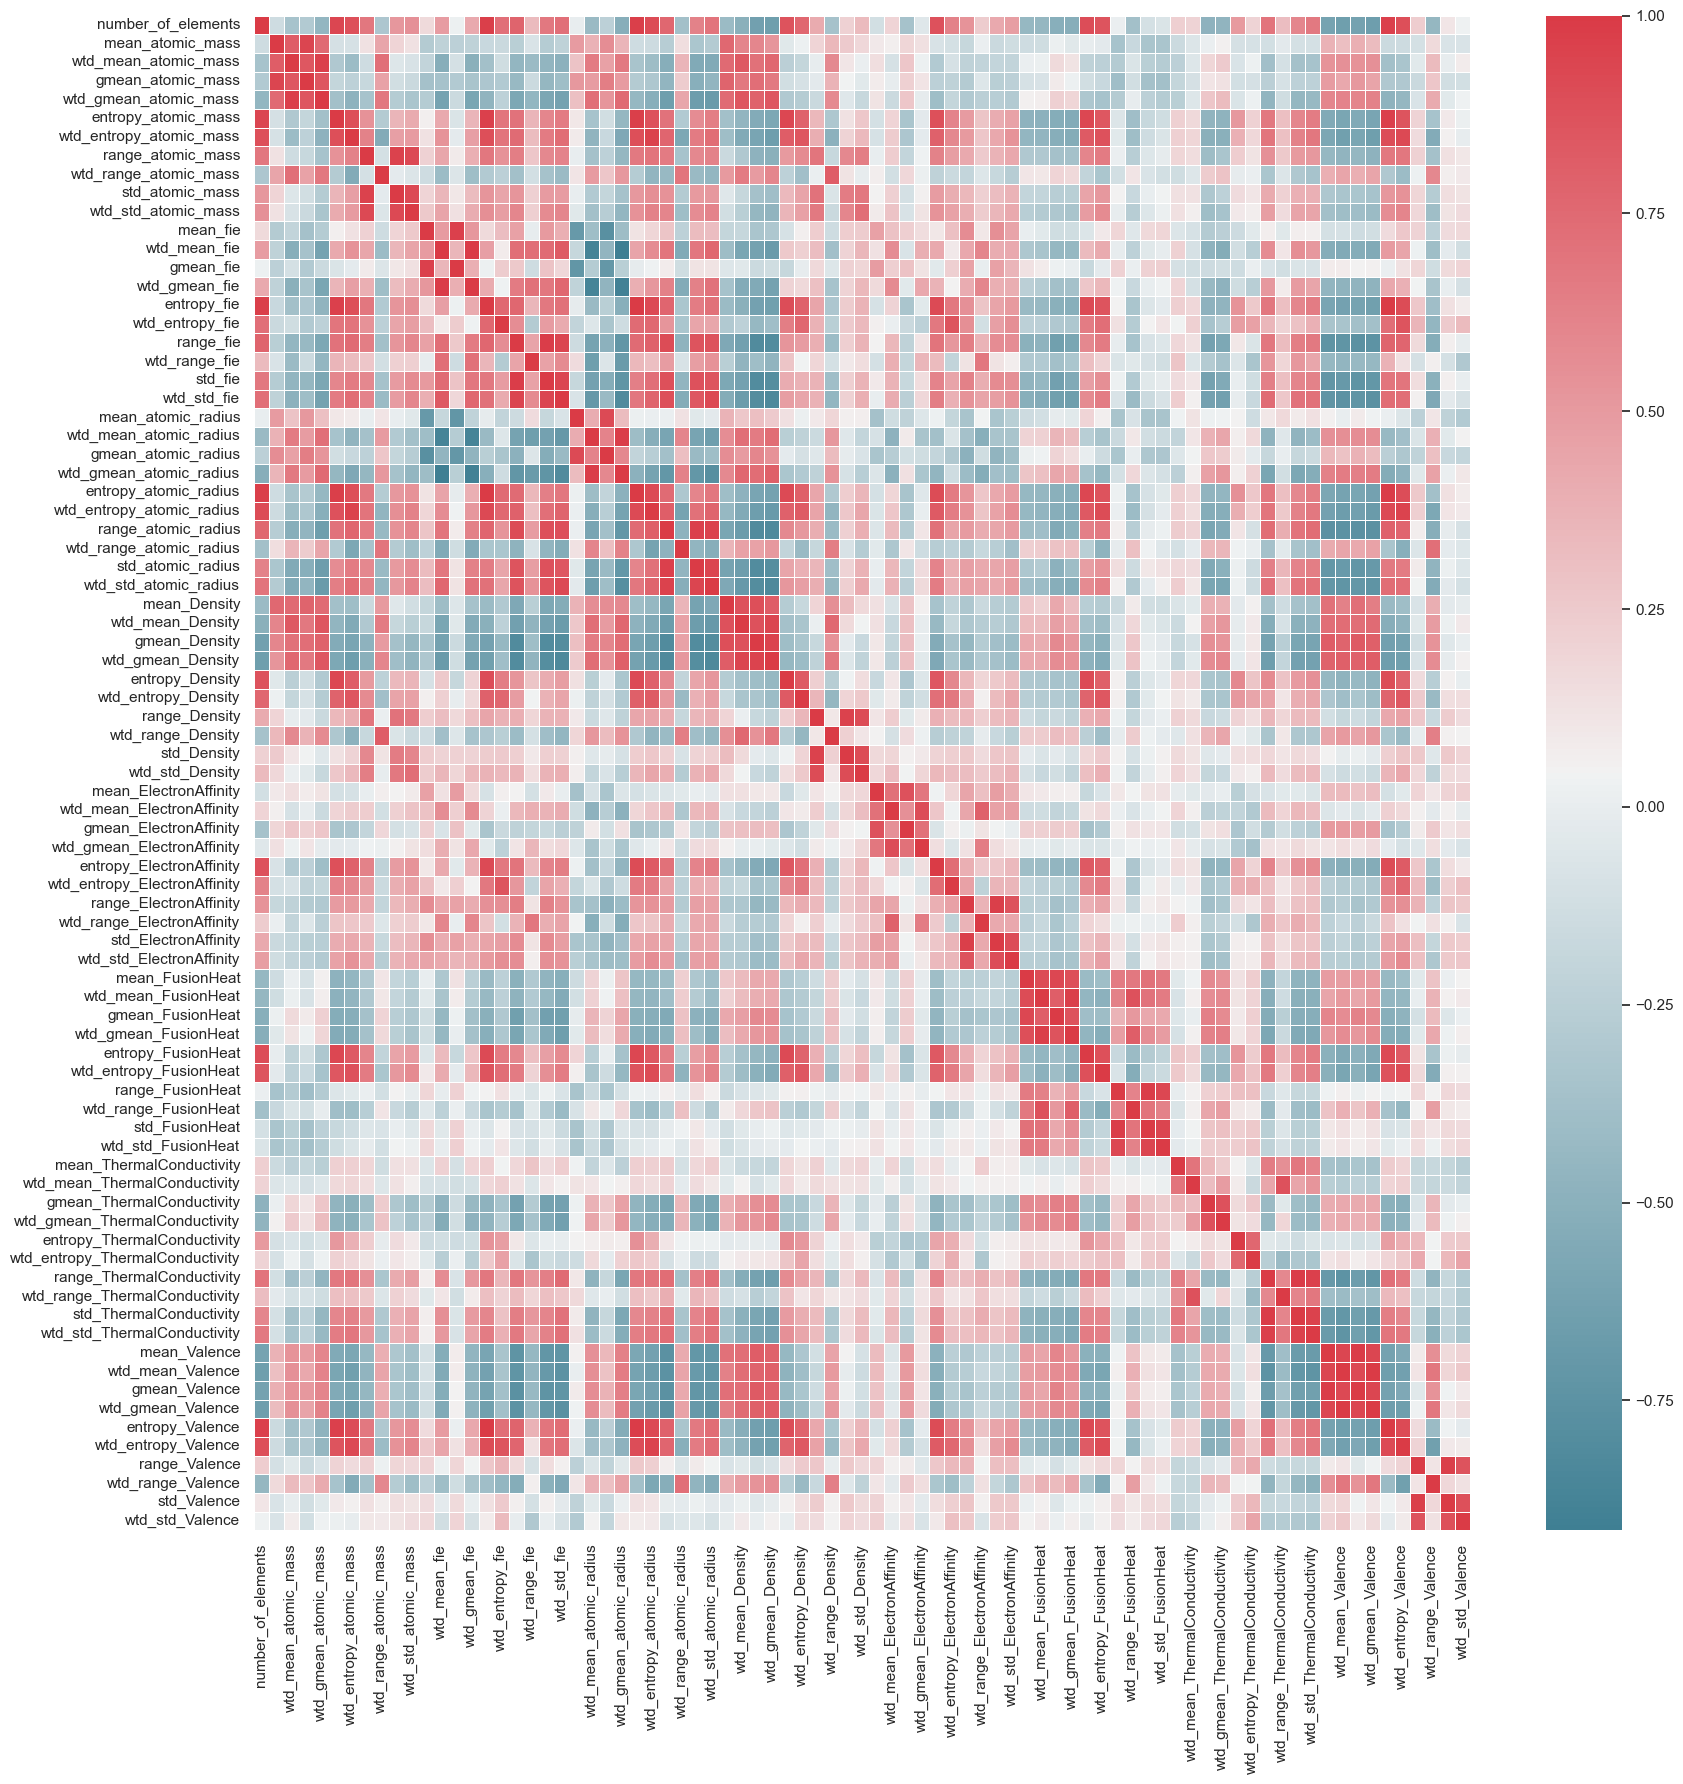

In [60]:
# Correlation Matrix
sns.set()
sns.set(style='darkgrid')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax= plt.subplots(figsize=(18,18))

sns.heatmap(df2_sub.corr(),cmap=cmap,fmt='.3f',linewidth=.5,ax=ax)
f.tight_layout()

### EDA report
We use the 'sweetviz' package to create an interactive EDA report, showcasing and visualizing the points we addressed above.

In [125]:
import sweetviz as sv
report = sv.analyze(df2_sub)


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:32 -> (00:00 left)


In [126]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Preprocess

After prelim eda, we see that normalcy is met thus standard scaler is the most useful scaler for this data. For completeness, we showed that the internal cross validation metrics between scaled and unscaled data are equivalent.

In [17]:
X = df.drop(columns="critical_temp")
y = df["critical_temp"]

## No scaling

In [18]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [19]:
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["r2", "neg_root_mean_squared_error"]
scores = cross_validate(lr, X, y, 
                        cv=split,
                        scoring=scoring,
                        return_train_score=True,
                        return_estimator=True,
                        n_jobs=-1)
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,2.207908,0.022633,LinearRegression(),0.770972,0.762466,-16.308913,-16.715386
1,1.930513,0.160886,LinearRegression(),-0.364983,0.769668,-40.298407,-16.409987
2,2.443389,0.034596,LinearRegression(),0.750902,0.767497,-17.031445,-16.532009
3,2.083992,0.029698,LinearRegression(),0.317922,0.764245,-28.201902,-16.644465
4,1.874411,0.019847,LinearRegression(),0.756333,0.765512,-16.989078,-16.567076


In [20]:
# this shows the slopes of each feature from the first fit
# commenting out bc out is too long
# scores["estimator"][0].coef_

In [21]:
# 5 fold internal cv on full data
print("Nonscaled r2: %.5f" % scores["test_r2"].mean())
print("Nonscaled rmse: %.5f" % np.abs(scores["test_neg_root_mean_squared_error"].mean()))

Nonscaled r2: 0.44623
Nonscaled rmse: 23.76595


## Standard Scaler

In [22]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lr", lr)
])
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [23]:
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["r2", "neg_root_mean_squared_error"]
scale_scores = cross_validate(pipe, X, y, 
                        cv=split,
                        scoring=scoring,
                        return_train_score=True,
                        return_estimator=True,
                        n_jobs=-1)
scale_scores = pd.DataFrame(scale_scores)
scale_scores

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.844124,0.027862,"(StandardScaler(), LinearRegression())",0.770972,0.762466,-16.308913,-16.715386
1,0.838846,0.021192,"(StandardScaler(), LinearRegression())",-0.364983,0.769668,-40.298407,-16.409987
2,0.867989,0.024237,"(StandardScaler(), LinearRegression())",0.750902,0.767497,-17.031445,-16.532009
3,0.842512,0.035070,"(StandardScaler(), LinearRegression())",0.317922,0.764245,-28.201902,-16.644465
4,0.902183,0.019018,"(StandardScaler(), LinearRegression())",0.756333,0.765512,-16.989078,-16.567076


In [24]:
# 5 fold internal cv on full data
print("std scale r2: %.5f" % scores["test_r2"].mean())
print("std scale rmse: %.5f" % np.abs(scores["test_neg_root_mean_squared_error"].mean()))

std scale r2: 0.44623
std scale rmse: 23.76595


# Modeling

## L1 / Lasso Gridsearch

In [25]:
lasso_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ('model', Lasso(random_state=77))
])

params = {'model__alpha': (np.logspace(-1, 1, 200))} 
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["neg_root_mean_squared_error", "r2"]
# scoring = {"R2": "r2", "RMSE": make_scorer("neg_root_mean_squared_error", greater_is_better=False)}


lasso_gs = GridSearchCV(lasso_pipe,
						param_grid=params,
						cv=split,
						scoring=scoring,
                        refit="neg_root_mean_squared_error",
						n_jobs=-1
)

In [26]:
lasso_gs.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso(random_state=77))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([ 0.1       ,  0.10234114,  0.10473709,  0.10718913,  0.10969858,
        0.11226678,  0.1148951 ,  0.11758496,  0.12033778,  0.12315506,
        0.12603829,  0.12898903,  0.13200884,  0.13509935,  0.138262...
        5.11143348,  5.23109931,  5.35356668,  5.47890118,  5.60716994,
        5.73844165,  5.87278661,  6.01027678,  6.15098579,  6.29498899,
        6.44236351,  6.59318827,  6.74754405,  6.90551352,  7.06718127,
        7.2326339 ,  7.40196   ,  7.57525026,  7.75259749,  7.93409667,
        8.11984499,  8.30994195,  8.50448934,  8.70359136,  8.90735464,
        9.1158883 ,  9.32930403,  9.54771611,  9.77124154, 10.        ])},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'r2'])

In [27]:
lasso_results = pd.DataFrame(lasso_gs.cv_results_).sort_values("mean_test_neg_root_mean_squared_error", ascending=False)
lasso_results[
    [
        "mean_test_neg_root_mean_squared_error",
        "mean_test_r2",
        "param_model__alpha"
    ]
].head(5)

,mean_test_neg_root_mean_squared_error,mean_test_r2,param_model__alpha
130,-20.087865,0.655845,2.025502
129,-20.089264,0.655723,1.979167
131,-20.090978,0.655796,2.072922
128,-20.091017,0.655580,1.933892
127,-20.096490,0.655293,1.889652


### Feature importance

In [28]:
lasso_feat_imp = pd.DataFrame({"Parameter":lasso_gs.best_estimator_.named_steps["model"].coef_, "Feature":lasso_gs.best_estimator_[:-1].get_feature_names_out()}, 
                             index=lasso_gs.best_estimator_[:-1].get_feature_names_out()
)

In [29]:
lasso_feat_imp["Parameter_Rank"] = ((lasso_feat_imp["Parameter"].abs().to_numpy()*-1).argsort().argsort() + 1)
lasso_feat_imp = lasso_feat_imp.reindex(lasso_feat_imp["Parameter"].abs().sort_values(ascending=False).index)
lasso_feat_imp.reset_index(drop=True, inplace=True)
lasso_feat_imp.head(20)

,Parameter,Feature,Parameter_Rank
0,11.416835,wtd_std_ThermalConductivity,1
1,7.531124,Ba,2
2,3.185943,wtd_entropy_atomic_mass,3
3,3.115142,Ca,4
4,-2.097953,wtd_gmean_ElectronAffinity,5
5,-2.014136,wtd_std_Valence,6
6,1.686567,Bi,7
7,1.538015,range_atomic_radius,8
8,1.368411,range_fie,9
9,-1.269696,Si,10


## L2 / Ridge Gridsearch

In [30]:
ridge_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ('model', Ridge(random_state=77))
])

params = {'model__alpha': (np.logspace(-1, 2, 300))} 
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["neg_root_mean_squared_error", "r2"]
# scoring = {"R2": "r2", "RMSE": make_scorer("neg_root_mean_squared_error", greater_is_better=False)}


ridge_gs = GridSearchCV(ridge_pipe,
						param_grid=params,
						cv=split,
						scoring=scoring,
                        refit="neg_root_mean_squared_error",
						n_jobs=-1
)

In [31]:
ridge_gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge(random_state=77))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([  0.1       ,   0.10233718,   0.10472898,   0.10717669,
         0.1096816 ,   0.11224506,   0.11486843,   0.11755311,
         0.12030053,   0.12311217,   0.12598953,   0.12893413,
         0.13194755,   0.1350314 ,   0.1381873...
        58.78016072,  60.1539588 ,  61.55986501,  62.99862978,
        64.47102107,  65.9778248 ,  67.51984523,  69.09790546,
        70.71284779,  72.36553423,  74.05684692,  75.78768864,
        77.55898323,  79.37167617,  81.226735  ,  83.1251499 ,
        85.06793416,  87.05612479,  89.09078301,  91.17299485,
        93.30387173,  95.48455103,  97.71619673, 100.        ])},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'r2'])

In [32]:
ridge_results = pd.DataFrame(ridge_gs.cv_results_).sort_values("mean_test_neg_root_mean_squared_error", ascending=False)
ridge_results[
    [
        "mean_test_neg_root_mean_squared_error",
        "mean_test_r2",
        "param_model__alpha"
    ]
].head(5)

,mean_test_neg_root_mean_squared_error,mean_test_r2,param_model__alpha
299,-22.430580,0.533886,100.0
298,-22.434626,0.533604,97.716197
297,-22.438754,0.533319,95.484551
296,-22.442965,0.533029,93.303872
295,-22.447259,0.532734,91.172995


### Feature importance

In [33]:
ridge_feat_imp = pd.DataFrame({"Parameter":ridge_gs.best_estimator_.named_steps["model"].coef_, "Feature":ridge_gs.best_estimator_[:-1].get_feature_names_out()}, 
                             index=ridge_gs.best_estimator_[:-1].get_feature_names_out()
)

In [34]:
ridge_feat_imp["Parameter_Rank"] = ((ridge_feat_imp["Parameter"].abs().to_numpy()*-1).argsort().argsort() + 1)
ridge_feat_imp = ridge_feat_imp.reindex(ridge_feat_imp["Parameter"].abs().sort_values(ascending=False).index)
ridge_feat_imp.reset_index(drop=True, inplace=True)
ridge_feat_imp.head(20)

,Parameter,Feature,Parameter_Rank
0,14.107843,wtd_mean_ThermalConductivity,1
1,12.494664,std_ElectronAffinity,2
2,-9.661939,range_ElectronAffinity,3
3,8.592817,Ba,4
4,7.840255,range_atomic_mass,5
5,-7.663575,wtd_mean_atomic_mass,6
6,7.607960,wtd_std_ThermalConductivity,7
7,-7.507625,wtd_gmean_ElectronAffinity,8
8,-7.451777,wtd_gmean_ThermalConductivity,9
9,-7.024038,std_atomic_radius,10
